# Projeto 1 - Gabriel Couto
Pergunta: Países com maior IDH realmente tem maiores taxas de suicídio tanto para homens quanto para mulheres?

### Introdução:
    É comum acreditar que países com maiores IDH's tenham menores taxa de suicídio (TS).
    Utilizando como minhas variáveis os dados disponíveis no Gapminder de IDH, TS masculina e TS femenina verifico resposta da minha pergunta calculando o coeficiente de correlação entre IDH e as TS de cada sexo para os anos disponíveis<br>

Importar bibliotecas e arquivos:

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

idh0 = pd.read_excel('Indicator_HDI.xlsx')
h0 = pd.read_excel('Suicide male indicator.xlsx')
m0 = pd.read_excel('Suicide female indicator.xlsx')

Criando funções para manipular as tabelas e para plotar os gráficos

In [3]:
def tabelaAno(ano):
    #Pegar colunas da variável escolhida e do ano
    m1 = m0.loc[:,['Suicide women age adjusted',ano]]
    h1 = h0.loc[:,['Suicide among men, per 100 000, age adjusted',ano]]
    idh1 = idh0.loc[:,['HDI',ano]]

    #Mudar nome das colunas
    m1.columns = ['Country','TSF_'+str(ano)]
    h1.columns = ['Country','TSM_'+str(ano)]
    idh1.columns = ['Country','IDH_'+str(ano)]

    #Mudar índice para o país
    m2 = m1.set_index('Country')
    h2 = h1.set_index('Country')
    idh2 = idh1.set_index('Country') 
    
    #Filtrar Nan's
    m3 = m2[m2['TSF_'+str(ano)]>-1]
    h3 = h2[h2['TSM_'+str(ano)]>-1]     
    idh3 = idh2[idh2['IDH_'+str(ano)]>-1]

    #Unir as tabelas
    dados = idh3.join(h3.join(m3,how='inner'), how='inner')
    return dados

def plotar(ano):
    tabelaAno(ano).plot.scatter(x="IDH_"+str(ano), y = "TSF_"+str(ano))#,  logx=True)
    tabelaAno(ano).plot.scatter(x="IDH_"+str(ano), y = "TSM_"+str(ano))#,  logx=True)

Gráfico de dispersão: IDH x Suicídios masculinos e IDH x Suicídios femininos

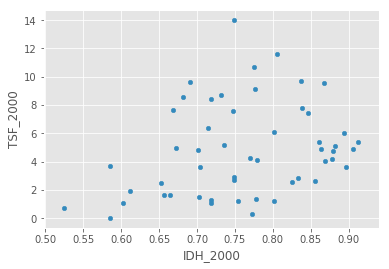

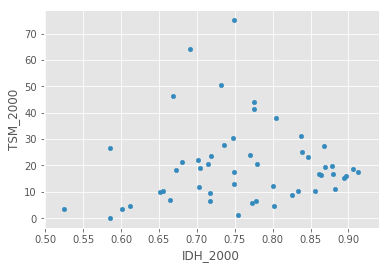

In [106]:
plotar(2000)

O coeficiente de correlação entre as variáveis:

In [6]:
tabelaAno(2000).corr()

,IDH_2000,TSM_2000,TSF_2000
IDH_2000,1.000000,0.065183,0.270789
TSM_2000,0.065183,1.000000,0.864259
TSF_2000,0.270789,0.864259,1.000000


O coef. de correlação entre IDH e Sui.Fem (0.27) sugere uma baixa correlação entre essas duas variáveis.<br>
O coef. de correlação entre IDH e Sui.Mas (0.065) sugere uma ausência de relação entre as duas variáveis.<br>
<br>
Aparentemente não existe correlação entre IDH e as TS para nenhum dos sexos, mas calcularemos o coef. de correlação para os outros anos disponíveis para confirmar nossa análise:

In [107]:
tsm2000,tsf2000 = tabelaAno(2000).corr().loc['IDH_2000',['TSM_2000','TSF_2000']]
tsm1990,tsf1990 = tabelaAno(1990).corr().loc['IDH_1990',['TSM_1990','TSF_1990']]
tsm1980,tsf1980 = tabelaAno(1980).corr().loc['IDH_1980',['TSM_1980','TSF_1980']]

correlacoes = pd.DataFrame({'IDH_1980':[tsm1980,tsf1980],'IDH_1990':[tsm1990,tsf1990],'IDH_2000':[tsm2000,tsf2000]}).T
correlacoes.columns=['TSM','TSF']
correlacoes

,TSM,TSF
IDH_1980,0.307300,0.331185
IDH_1990,0.275305,0.363619
IDH_2000,0.065183,0.270789


### Conclusão:
Não existe a correlação razoável entre a taxa de homícidio masculino e o IDH e nem entre a taxa de homicídio feminina e o IDH